# Ocular Disease Classification

In [1]:
#list of useful imports that  I will use
%matplotlib inline
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image 
import tensorflow as tf



from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = '/content/drive/My Drive/Copy of 611716_1094714_bundle_archive.zip'

##Unziping data set

In [4]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

drive  ODIR-5K	sample_data


In [5]:
#see contents of train file
!ls ODIR-5K  

 data.xlsx  'Testing Images'  'Training Images'


In [6]:
#save the path into variable to use it easily next times.
DATA_FOLDER= 'ODIR-5K/'

In [7]:
data = os.listdir(DATA_FOLDER)

In [8]:
!ls ODIR-5K

 data.xlsx  'Testing Images'  'Training Images'


In [9]:
DATA_FOLDER = '/content/ODIR-5K/Training Images'

In [10]:
images = [ ]
for i in os.listdir(DATA_FOLDER):
  image_path = os.path.join(DATA_FOLDER,i)
  images.append(image_path)

In [11]:
images[:10]

['/content/ODIR-5K/Training Images/3107_right.jpg',
 '/content/ODIR-5K/Training Images/2096_right.jpg',
 '/content/ODIR-5K/Training Images/625_left.jpg',
 '/content/ODIR-5K/Training Images/597_left.jpg',
 '/content/ODIR-5K/Training Images/166_left.jpg',
 '/content/ODIR-5K/Training Images/4102_left.jpg',
 '/content/ODIR-5K/Training Images/2647_right.jpg',
 '/content/ODIR-5K/Training Images/479_left.jpg',
 '/content/ODIR-5K/Training Images/2669_left.jpg',
 '/content/ODIR-5K/Training Images/3330_right.jpg']

In [12]:
len(images)

7000

In [13]:
data = pd.read_excel('/content/ODIR-5K/data.xlsx')

In [14]:
data.head()

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  ...  C  A  H  M  O
0   0           69      Female  0_left.jpg  0_right.jpg  ...  1  0  0  0  0
1   1           57        Male  1_left.jpg  1_right.jpg  ...  0  0  0  0  0
2   2           42        Male  2_left.jpg  2_right.jpg  ...  0  0  0  0  1
3   3           66        Male  3_left.jpg  3_right.jpg  ...  0  0  0  0  1
4   4           53        Male  4_left.jpg  4_right.jpg  ...  0  0  0  0  1

[5 rows x 15 columns]

In [15]:
data.shape

(3500, 15)

In [16]:
data.head()

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  ...  C  A  H  M  O
0   0           69      Female  0_left.jpg  0_right.jpg  ...  1  0  0  0  0
1   1           57        Male  1_left.jpg  1_right.jpg  ...  0  0  0  0  0
2   2           42        Male  2_left.jpg  2_right.jpg  ...  0  0  0  0  1
3   3           66        Male  3_left.jpg  3_right.jpg  ...  0  0  0  0  1
4   4           53        Male  4_left.jpg  4_right.jpg  ...  0  0  0  0  1

[5 rows x 15 columns]

In [17]:
print(data.loc[(data.C==1)].shape)
print(data.loc[data.C==0].shape)

(212, 15)
(3288, 15)


In [18]:
data.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

In [19]:
data.head()

id  age     sex left_fundus  ... amd hypertension myopia  other
0   0   69  Female  0_left.jpg  ...   0            0      0      0
1   1   57    Male  1_left.jpg  ...   0            0      0      0
2   2   42    Male  2_left.jpg  ...   0            0      0      1
3   3   66    Male  3_left.jpg  ...   0            0      0      1
4   4   53    Male  4_left.jpg  ...   0            0      0      1

[5 rows x 15 columns]

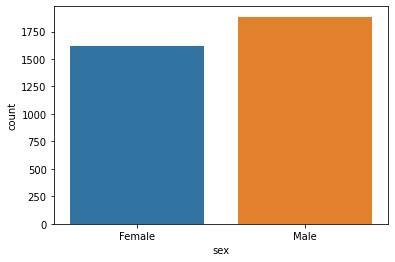

In [20]:
sns.countplot(x=data['sex'], data=data)

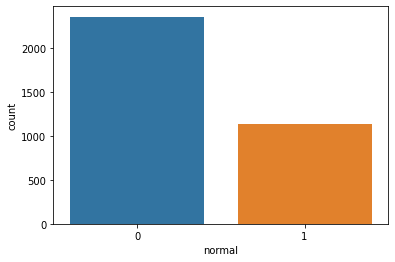

In [21]:
sns.countplot(x=data['normal'], data=data)

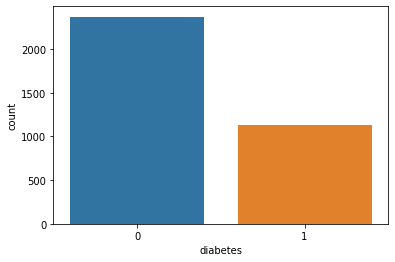

In [22]:
sns.countplot(x=data['diabetes'], data=data)

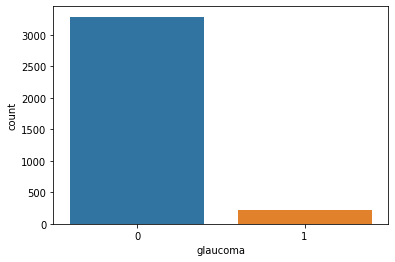

In [23]:
sns.countplot(x=data['glaucoma'], data=data)

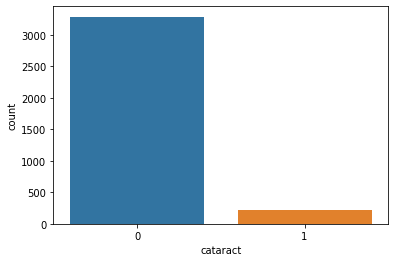

In [24]:
sns.countplot(x=data['cataract'], data=data)

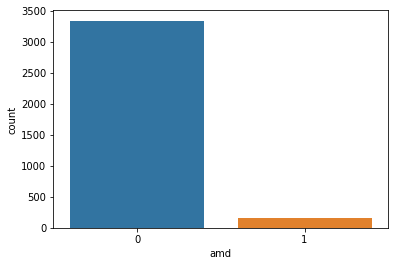

In [25]:
sns.countplot(x=data['amd'], data=data)

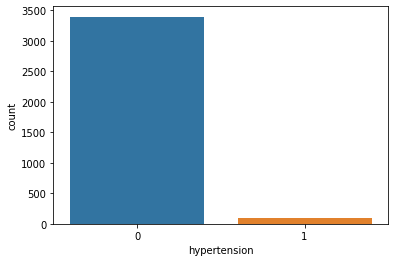

In [26]:
sns.countplot(x=data['hypertension'], data=data)

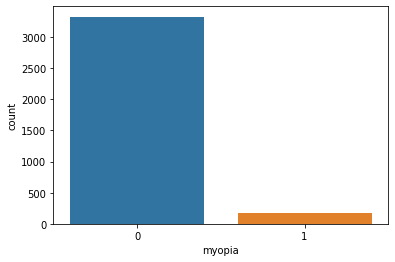

In [27]:
sns.countplot(x=data['myopia'], data=data)

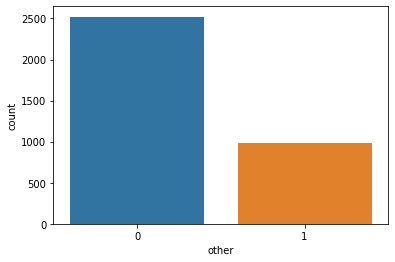

In [28]:
sns.countplot(x=data['other'], data=data)

In [29]:
data.loc[(data.cataract==1)]['left_diagnosys'].value_counts()

cataract                                                                   135
normal fundus                                                               24
cataract，lens dust                                                           8
moderate non proliferative retinopathy                                       6
lens dust，cataract                                                           5
mild nonproliferative retinopathy                                            5
lens dust，normal fundus                                                      4
normal fundus，lens dust                                                      3
refractive media opacity                                                     3
cataract，moderate non proliferative retinopathy                              3
severe proliferative diabetic retinopathy                                    2
cataract，mild nonproliferative retinopathy                                   2
hypertensive retinopathy                            

In [30]:
data.loc[(data.cataract==1)]['right_diagnosys'].value_counts()

cataract                                                                  127
normal fundus                                                              24
moderate non proliferative retinopathy                                      9
cataract，lens dust                                                          6
drusen                                                                      5
lens dust，cataract                                                          5
refractive media opacity                                                    4
mild nonproliferative retinopathy                                           4
moderate non proliferative retinopathy，cataract                             3
epiretinal membrane                                                         3
macular epiretinal membrane                                                 3
cataract，moderate non proliferative retinopathy                             3
lens dust，normal fundus                                         

In [31]:
def has_cataract_mentioned(text):
    if 'cataract' in text:
        return 1
    else:
        return 0

In [32]:
data['le_cataract'] = data['left_diagnosys'].apply(lambda x: has_cataract_mentioned(x))
data['re_cataract'] = data['right_diagnosys'].apply(lambda x: has_cataract_mentioned(x))

In [33]:
cataract_left_list = data.loc[(data.cataract==1) & (data.le_cataract==1)]['left_fundus'].values
cataract_right_list = data.loc[(data.cataract==1) & (data.re_cataract==1)]['right_fundus'].values
print(len(cataract_left_list), len(cataract_right_list))
non_cataract_left_list = data.loc[(data.cataract==0) & (data.left_diagnosys=="normal fundus")]['left_fundus'].sample(150, random_state=314).values
non_cataract_right_list = data.loc[(data.cataract==0) & (data.right_diagnosys=="normal fundus")]['right_fundus'].sample(150, random_state=314).values
print(len(non_cataract_left_list), len(non_cataract_right_list))

159 154
150 150


In [34]:
cataract_list = np.concatenate((cataract_left_list, cataract_right_list), axis = 0)
non_cataract_list = np.concatenate((non_cataract_left_list, non_cataract_right_list), axis = 0)
print(len(non_cataract_list), len(cataract_list))

300 313


In [35]:
print(len(os.listdir(DATA_FOLDER)))

7000


In [36]:
def label_image(label):
    if label == 1:
        return [1,0]
    elif label == 0: 
        return [0,1]

In [ ]:
import cv2 as cv

In [52]:
def is_cataract(data_image_list, DATA_FOLDER):
    data_df_is_cataract = []
    label_is_cataract = []
    for img in data_image_list:
        path = os.path.join(DATA_FOLDER,img)
        label = 'is_cataract'
        label_is_cataract.append(label)
        data_df_is_cataract.append(path)
    data_is_cataract = pd.DataFrame(list(zip(data_df_is_cataract, label_is_cataract)), columns =['image_path', 'classe_label'])
    return data_is_cataract

In [53]:
def no_cataract(data_image_list, DATA_FOLDER):
    data_df_no_cataract = []
    label_no_cataract = []
    for img in data_image_list:
        path = os.path.join(DATA_FOLDER,img)
        label = 'no_cataract'
        label_no_cataract.append(label)
        data_df_no_cataract.append(path)
    data_no_cataract = pd.DataFrame(list(zip(data_df_no_cataract, label_no_cataract)), columns =['image_path', 'classe_label'])
    return data_no_cataract

In [38]:
from random import shuffle

In [54]:
cat_df = is_cataract(cataract_list, DATA_FOLDER)

In [55]:
cat_df.shape

(313, 2)

In [56]:
cat_df.head()

image_path classe_label
0    /content/ODIR-5K/Training Images/0_left.jpg  is_cataract
1   /content/ODIR-5K/Training Images/81_left.jpg  is_cataract
2  /content/ODIR-5K/Training Images/103_left.jpg  is_cataract
3  /content/ODIR-5K/Training Images/119_left.jpg  is_cataract
4  /content/ODIR-5K/Training Images/254_left.jpg  is_cataract

In [57]:
cat_no_df = no_cataract(non_cataract_list, DATA_FOLDER)

In [58]:
cat_no_df.shape

(300, 2)

In [59]:
cat_no_df.head()

image_path classe_label
0    /content/ODIR-5K/Training Images/52_left.jpg  no_cataract
1  /content/ODIR-5K/Training Images/3421_left.jpg  no_cataract
2  /content/ODIR-5K/Training Images/2828_left.jpg  no_cataract
3  /content/ODIR-5K/Training Images/2401_left.jpg  no_cataract
4    /content/ODIR-5K/Training Images/51_left.jpg  no_cataract

In [66]:
concat_data = pd.concat([cat_df, cat_no_df],axis =0)

In [67]:
concat_data.shape

(613, 2)

In [68]:
concat_data.head()

image_path classe_label
0    /content/ODIR-5K/Training Images/0_left.jpg  is_cataract
1   /content/ODIR-5K/Training Images/81_left.jpg  is_cataract
2  /content/ODIR-5K/Training Images/103_left.jpg  is_cataract
3  /content/ODIR-5K/Training Images/119_left.jpg  is_cataract
4  /content/ODIR-5K/Training Images/254_left.jpg  is_cataract

In [69]:
# shuffle the DataFrame rows
concat_data = concat_data.sample(frac = 1)

In [70]:
concat_data.head()

image_path classe_label
138   /content/ODIR-5K/Training Images/2988_left.jpg  no_cataract
270  /content/ODIR-5K/Training Images/2198_right.jpg  is_cataract
92    /content/ODIR-5K/Training Images/2158_left.jpg  is_cataract
142   /content/ODIR-5K/Training Images/1162_left.jpg  no_cataract
220  /content/ODIR-5K/Training Images/2133_right.jpg  is_cataract

is_cataract    313
no_cataract    300
Name: classe_label, dtype: int64


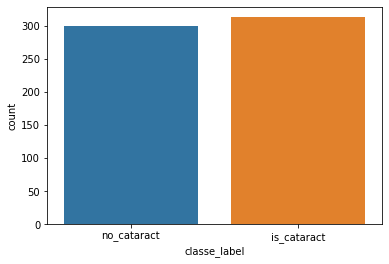

In [71]:
print(concat_data.classe_label.value_counts())
sns.countplot(x= concat_data.classe_label)

In [72]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = concat_data[concat_data.classe_label== 'is_cataract']
df_minority = concat_data[concat_data.classe_label== 'no_cataract']

#Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True,  n_samples=500,random_state=123)
df_majority_upsampled = resample(df_majority, replace=True,  n_samples=500,random_state=123)

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled,df_majority_upsampled])
 
# Display new class counts
df_upsampled['classe_label'].value_counts()

no_cataract    500
is_cataract    500
Name: classe_label, dtype: int64

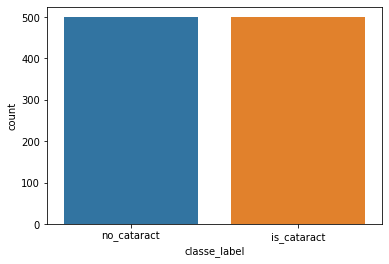

In [73]:
sns.countplot(x= df_upsampled['classe_label'])

In [77]:
# shuffle the DataFrame rows
df_upsampled = df_upsampled.sample(frac = 1)

In [78]:
df_upsampled.head()

image_path classe_label
137  /content/ODIR-5K/Training Images/2646_left.jpg  no_cataract
4     /content/ODIR-5K/Training Images/254_left.jpg  is_cataract
48   /content/ODIR-5K/Training Images/2103_left.jpg  is_cataract
106  /content/ODIR-5K/Training Images/2556_left.jpg  no_cataract
60   /content/ODIR-5K/Training Images/2830_left.jpg  no_cataract

## Resize the images

In [79]:
from PIL import Image
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [80]:
#save resized images into images.
images = [resize_images(img) for img in df_upsampled['image_path']]

In [82]:
# save the class into class_names
class_names = list(df_upsampled['classe_label'])

In [83]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'no_cataract')

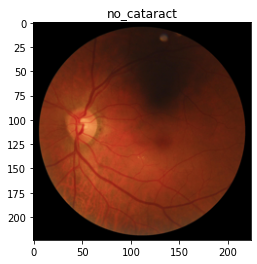

In [84]:
#See the image with class label
plt.imshow(images[500])
plt.title(class_names[500])

Text(0.5, 1.0, 'is_cataract')

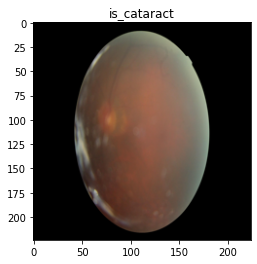

In [88]:
#See the image with class label
plt.imshow(images[10])
plt.title(class_names[10])

In [89]:
# Convert the images into array
images =  np.array(images)

In [90]:
# Shape of the images
images.shape

(1000, 224, 224, 3)




























## Label encoder

In [91]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(df_upsampled['classe_label'])

In [100]:
def label_image(label):
    if label == 'is_cataract':
        return [1,0]
    elif label == 'no_cataract': 
        return [0,1]

In [101]:
y = [label_image(label) for label in df_upsampled['classe_label']]

In [109]:
y = np.array(y)


## Spliting data into training and testing

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [111]:
X_train.shape

(700, 224, 224, 3)

In [112]:
X_test.shape

(300, 224, 224, 3)

## CNN

In [113]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)       

In [114]:
# Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)
model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [116]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/ocular_weights-improvement_cnn-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [121]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test,y_test),batch_size = 128,callbacks = callbacks_list )

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 0.6560 - accuracy: 0.5900
Epoch 00001: val_accuracy did not improve from 0.59333
6/6 [==============================] - 6s 1s/step - loss: 0.6560 - accuracy: 0.5900 - val_loss: 0.6778 - val_accuracy: 0.5567
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.6214
Epoch 00002: val_accuracy improved from 0.59333 to 0.60333, saving model to /content/drive/My Drive/ocular_weights-improvement_cnn-02-0.60.hdf5
6/6 [==============================] - 6s 1s/step - loss: 0.6652 - accuracy: 0.6214 - val_loss: 0.6763 - val_accuracy: 0.6033
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.5814
Epoch 00003: val_accuracy did not improve from 0.60333
6/6 [==============================] - 6s 1s/step - loss: 0.6594 - accuracy: 0.5814 - val_loss: 0.6948 - val_accuracy: 0.4867
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 0.6577 - accuracy: 0.6143


In [123]:
#File path
file_name = '/content/drive/My Drive/ocular_cnn.h5'
tf.keras.models.save_model(model,file_name)

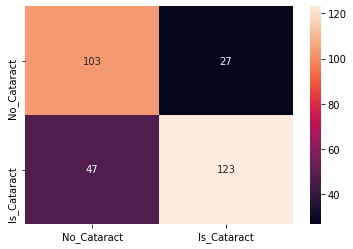

In [122]:
# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['No_Cataract','Is_Cataract']
df_heatmap = pd.DataFrame(confusion_matrix(model.predict_classes(X_test),np.argmax(y_test,axis=1)), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

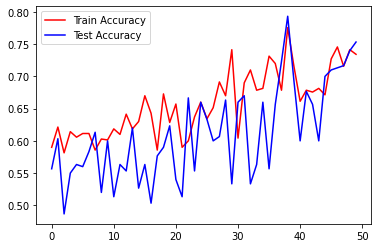

In [124]:
#Plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

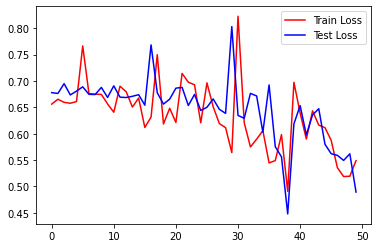

In [125]:
#Plot the loss plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [126]:
#print the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.753333330154419


In [164]:
# Creating results data frame 
results = pd.DataFrame(columns=['model', 'Test-Accuracy' ])
new = ['CNN ',score[1]]
results.loc[0] = new

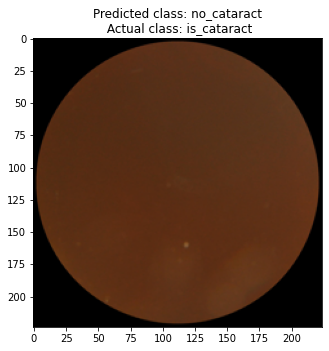

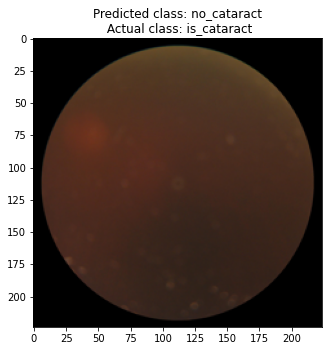

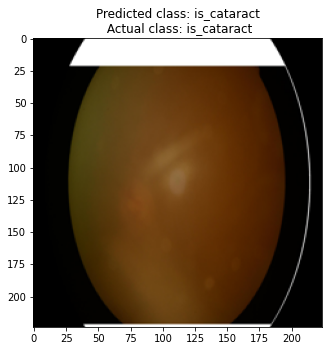

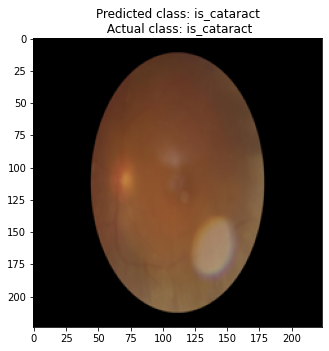

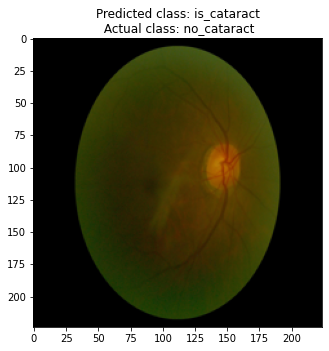

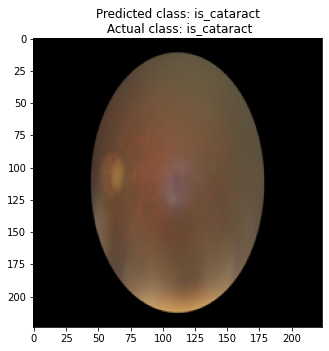

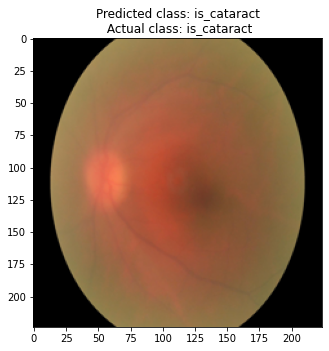

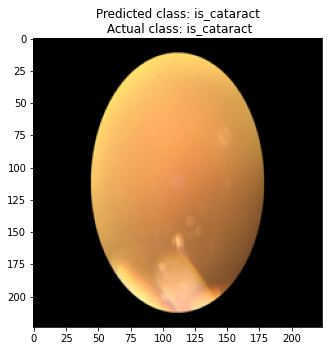

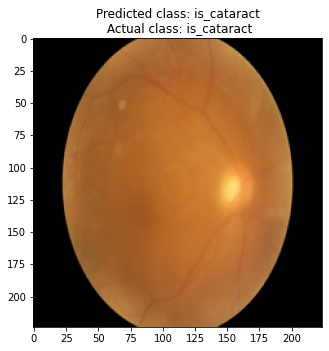

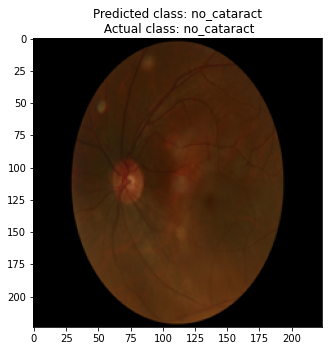

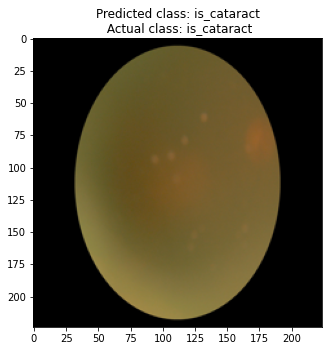

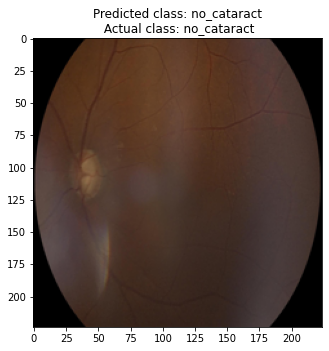

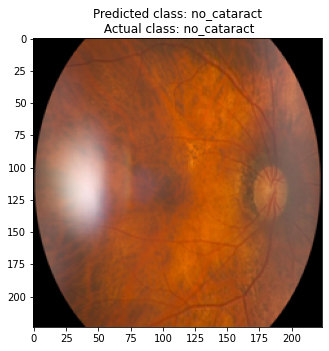

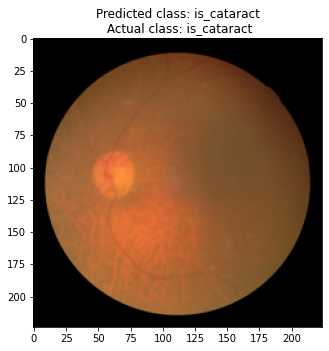

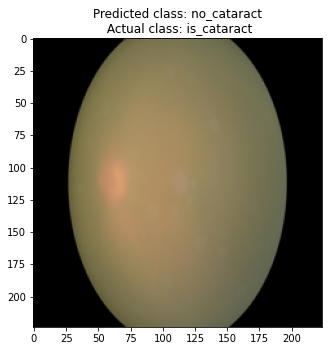

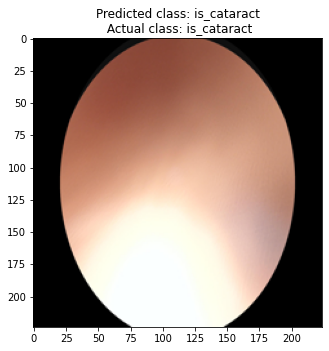

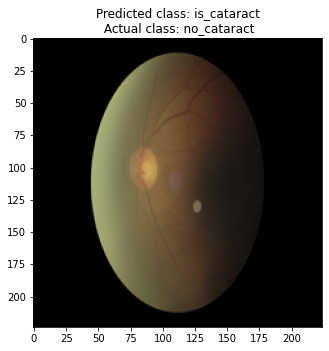

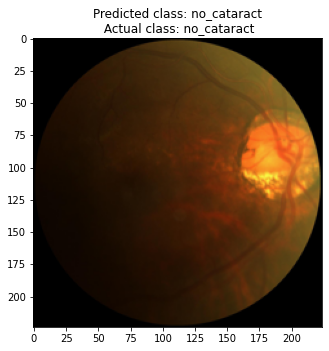

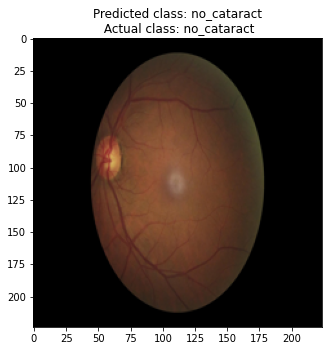

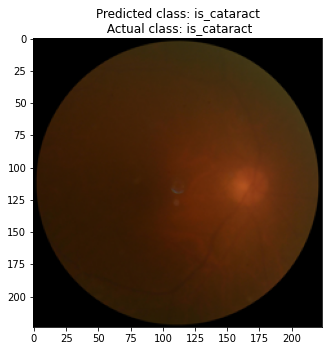

In [128]:
# print images with actual and predicted class labels
for i in range(20):
  plt.figure(figsize=(30,30))
  plt.subplot(4,5,i+1)
  pred = model.predict_classes(np.array([X_test[i]]))[0]
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(X_test[i])

## VGG-16

In [129]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16

In [130]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 1s 0us/step


In [131]:
vgg.trainable=False

In [132]:
# Set the vgg16 model

model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))

In [133]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_1.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [134]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/ocular_weights-improvement_vgg16-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [135]:
#Fit the data or train the model
History_1 = model_1.fit(X_train, y_train, epochs = 50, validation_data = (X_test,y_test),batch_size = 64,callbacks=callbacks_list)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 26.9352 - accuracy: 0.7643
Epoch 00001: val_accuracy improved from -inf to 0.94000, saving model to /content/drive/My Drive/ocular_weights-improvement_vgg16-01-0.94.hdf5
11/11 [==============================] - 16s 1s/step - loss: 26.9352 - accuracy: 0.7643 - val_loss: 0.2938 - val_accuracy: 0.9400
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.3468 - accuracy: 0.9329
Epoch 00002: val_accuracy improved from 0.94000 to 0.95333, saving model to /content/drive/My Drive/ocular_weights-improvement_vgg16-02-0.95.hdf5
11/11 [==============================] - 7s 655ms/step - loss: 0.3468 - accuracy: 0.9329 - val_loss: 0.2011 - val_accuracy: 0.9533
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.4314 - accuracy: 0.9143
Epoch 00003: val_accuracy improved from 0.95333 to 0.97667, saving model to /content/drive/My Drive/ocular_weights-improvement_vgg16-03-0.98.hdf5
11/11 [==============

In [136]:
#File path
file_name = '/content/drive/My Drive/ocular_vgg16.h5'
tf.keras.models.save_model(model_1,file_name)

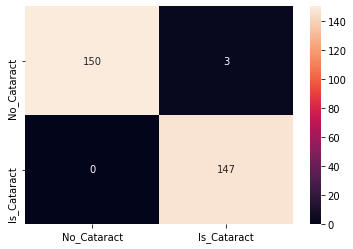

In [137]:
# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['No_Cataract','Is_Cataract']
df_heatmap = pd.DataFrame(confusion_matrix(model_1.predict_classes(X_test),np.argmax(y_test,axis=1)), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

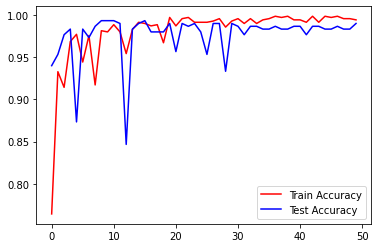

In [138]:
#Plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

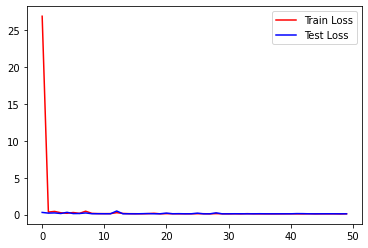

In [139]:
#Plot the loss plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [140]:
#print the test accuracy
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.9900000095367432


In [165]:
new = ['VGG-16 ',score_1[1]]
results.loc[1] = new

Predicted class: is_cataract
Actual class: is_cataract


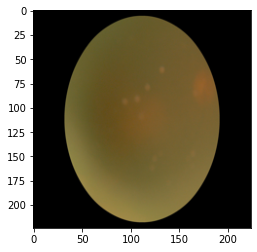

In [142]:
#Cheking the model
i = 10
pred = model_1.predict_classes(np.array([X_test[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

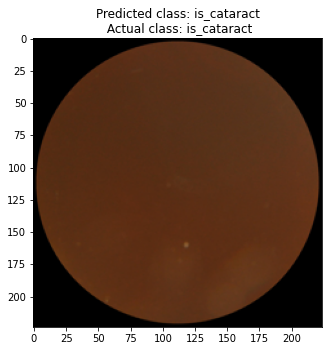

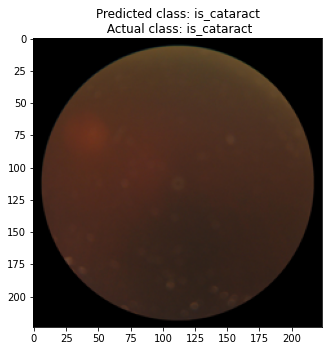

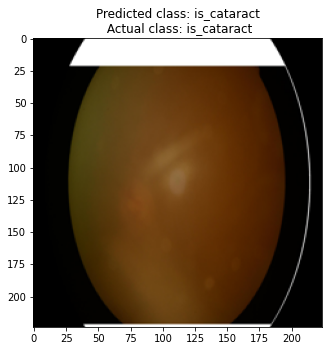

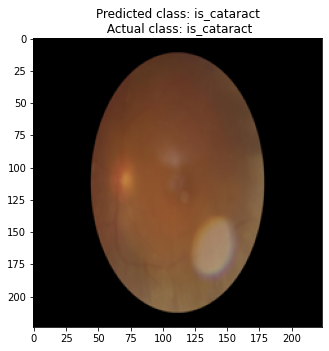

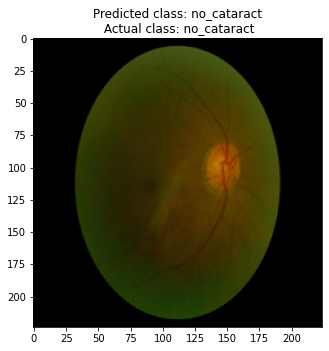

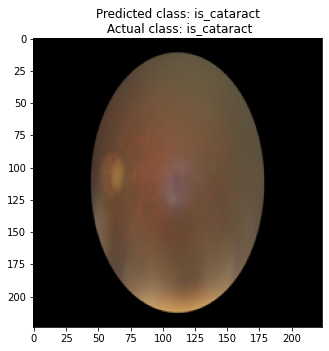

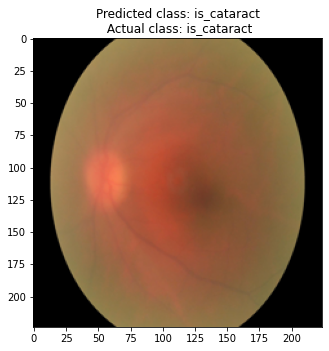

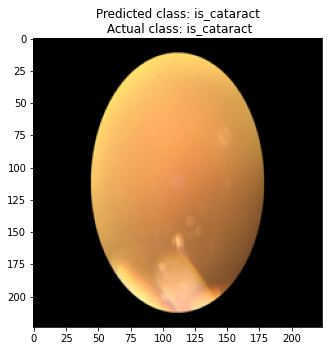

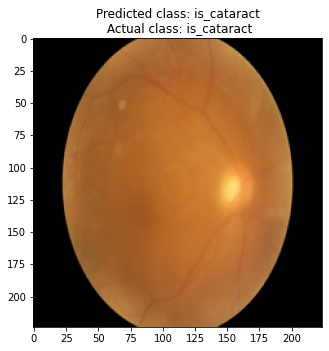

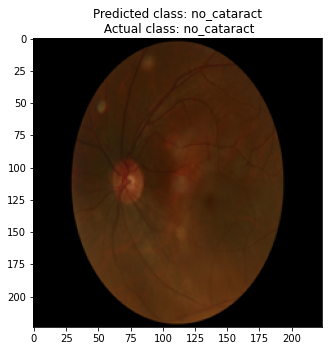

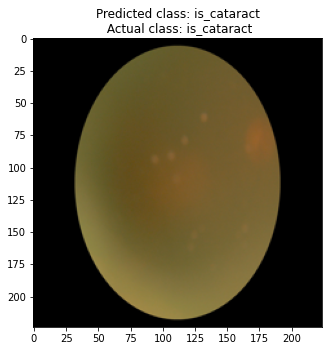

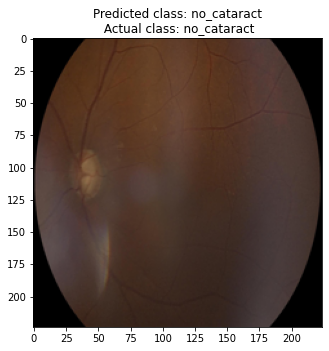

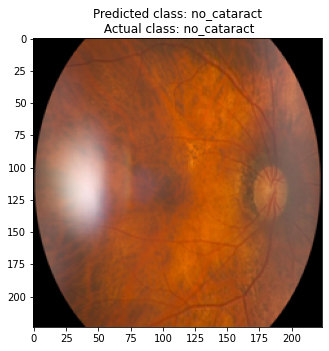

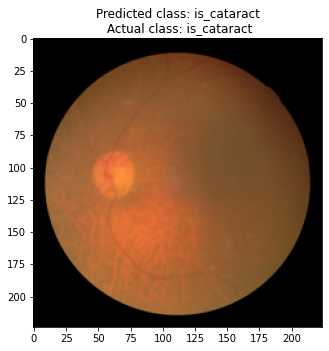

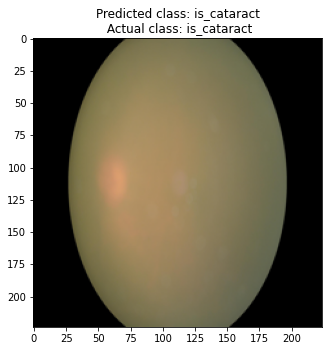

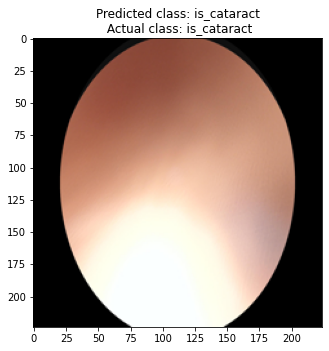

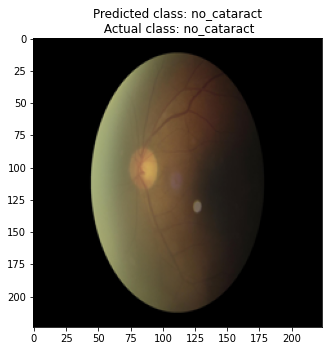

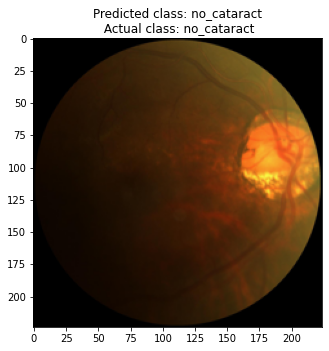

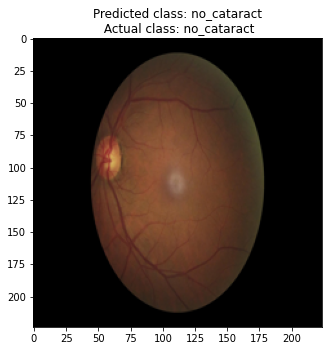

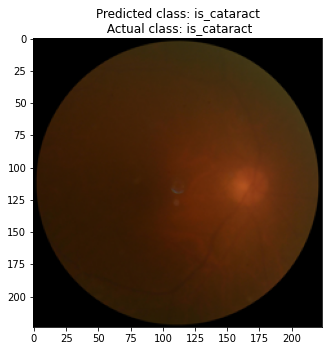

In [143]:
# print images with actual and predicted class labels
for i in range(20):
  plt.figure(figsize=(30,30))
  plt.subplot(4,5,i+1)
  pred = model_1.predict_classes(np.array([X_test[i]]))[0]
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(X_test[i])

## MobileNet

In [148]:
from tensorflow.keras.applications import MobileNet

In [149]:
mob = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

17227776/17225924 [==============================] - 0s 0us/step


In [150]:
mob.trainable=False

In [151]:
# Set the vgg16 model

model_mob=Sequential()
model_mob.add(mob)
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(2, activation='softmax'))

In [152]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_mob.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [153]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/ocular_weights-improvement_mobilenet-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [167]:
#Fit the data or train the model
History_mob = model_mob.fit(X_train, y_train, epochs = 50, validation_data = (X_test,y_test),batch_size = 64,callbacks=callbacks_list)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.1861 - accuracy: 0.9529
Epoch 00001: val_accuracy improved from 0.93667 to 0.94000, saving model to /content/drive/My Drive/ocular_weights-improvement_mobilenet-01-0.94.hdf5
11/11 [==============================] - 3s 235ms/step - loss: 0.1861 - accuracy: 0.9529 - val_loss: 0.2323 - val_accuracy: 0.9400
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 0.9800
Epoch 00002: val_accuracy did not improve from 0.94000
11/11 [==============================] - 2s 191ms/step - loss: 0.1200 - accuracy: 0.9800 - val_loss: 0.2124 - val_accuracy: 0.9333
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.3067 - accuracy: 0.9171
Epoch 00003: val_accuracy did not improve from 0.94000
11/11 [==============================] - 2s 188ms/step - loss: 0.3067 - accuracy: 0.9171 - val_loss: 0.2165 - val_accuracy: 0.9400
Epoch 4/50
11/11 [==============================] - ETA: 0s - los

In [168]:
#File path
file_name = '/content/drive/My Drive/ocular_mobilenet.h5'
tf.keras.models.save_model(model_mob,file_name)

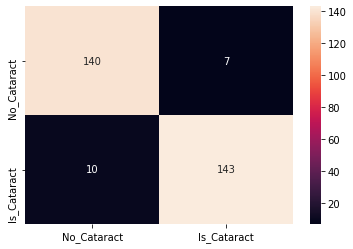

In [169]:
# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['No_Cataract','Is_Cataract']
df_heatmap = pd.DataFrame(confusion_matrix(model_mob.predict_classes(X_test),np.argmax(y_test,axis=1)), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

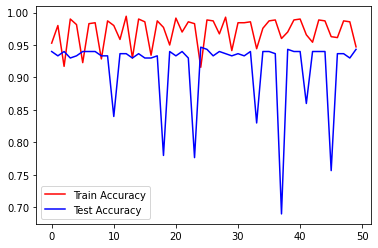

In [170]:
#Plot the accuracy plot
plt.plot(History_mob.history['accuracy'], 'r')
plt.plot(History_mob.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

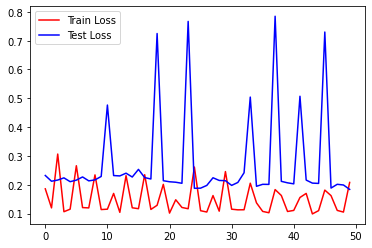

In [171]:
#Plot the loss plot
plt.plot(History_mob.history['loss'], 'r')
plt.plot(History_mob.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [172]:
#print the test accuracy
score_2 = model_mob.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9433333277702332


In [173]:
new = ['MobileNet ',score_2[1]]
results.loc[2] = new

Predicted class: is_cataract
Actual class: is_cataract


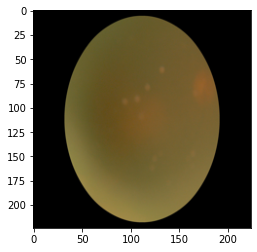

In [174]:
#Cheking the model
i = 10
pred = model_mob.predict_classes(np.array([X_test[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

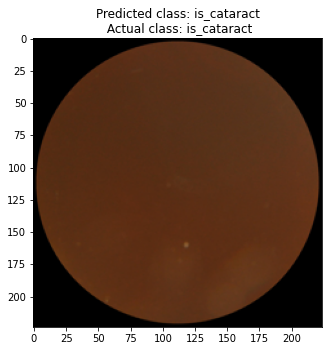

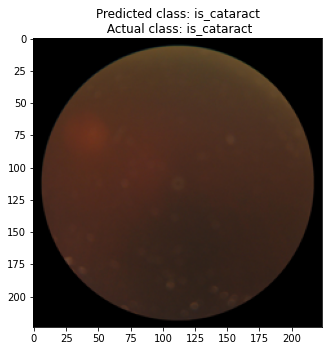

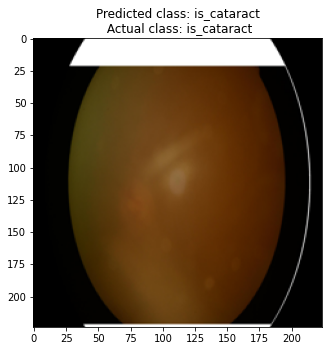

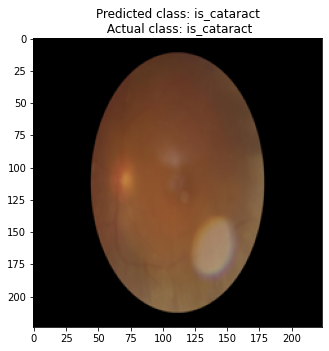

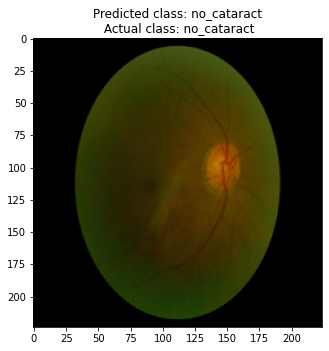

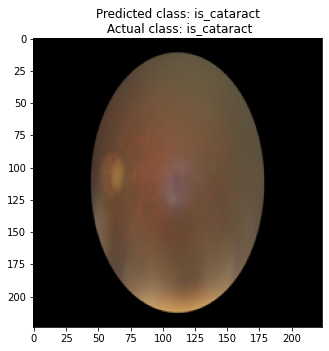

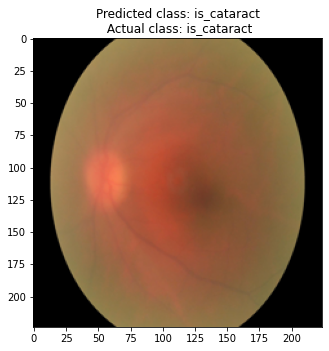

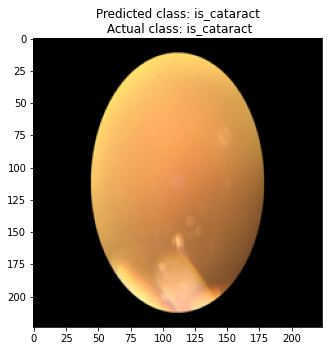

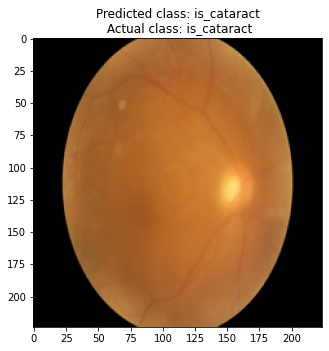

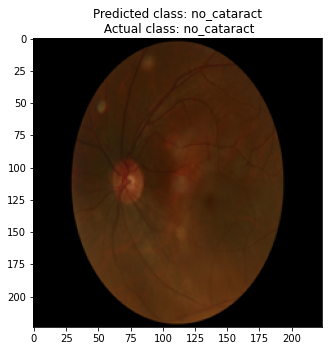

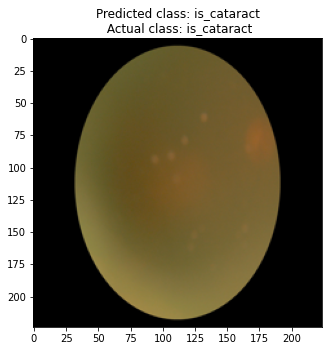

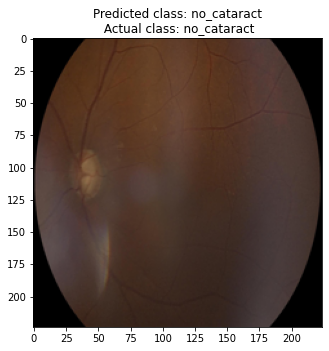

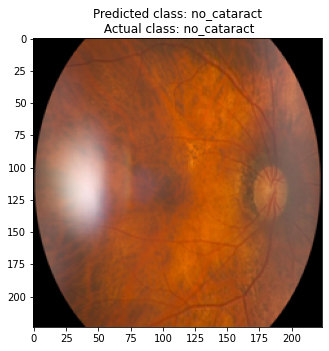

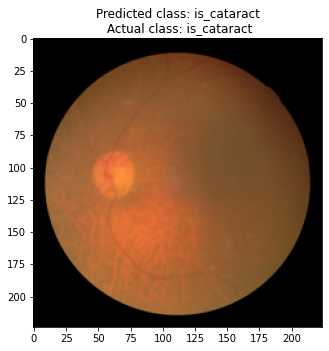

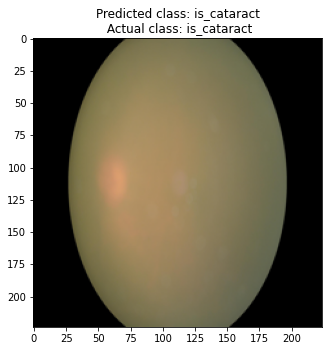

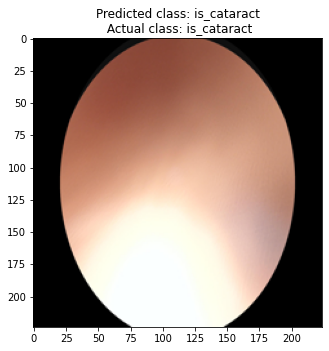

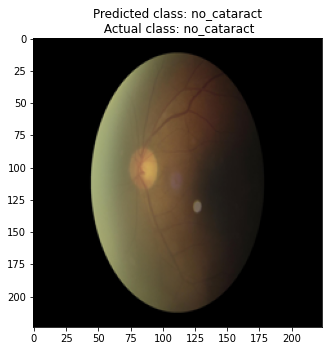

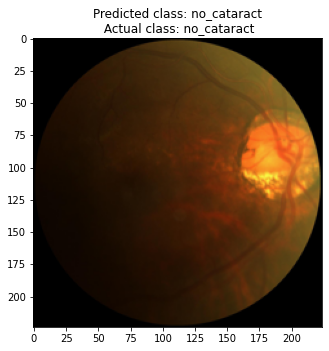

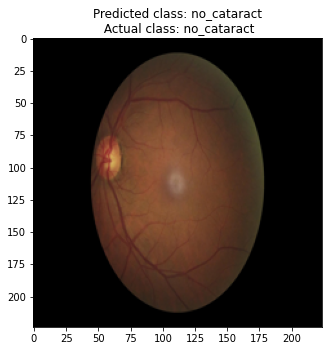

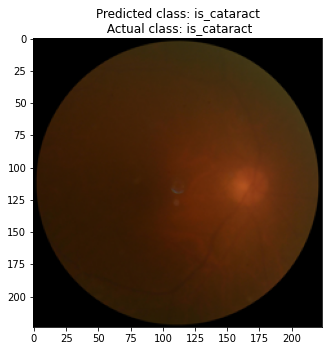

In [175]:
# print images with actual and predicted class labels
for i in range(20):
  plt.figure(figsize=(30,30))
  plt.subplot(4,5,i+1)
  pred = model_mob.predict_classes(np.array([X_test[i]]))[0]
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(X_test[i])

## Performance Table

In [176]:
results

model  Test-Accuracy
0        CNN        0.753333
1     VGG-16        0.990000
2  MobileNet        0.943333